In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('ER-2024.xlsx')

In [7]:
df.head()

,Codigo,Cuenta,2024,2023,2022
0,705000000,PRESTACIONES DE SERVICIOS,52303.00,134308.50,144997.97
1,705000001,CERTIFICADOS DIGITALES,1560.00,2250.50,1641.00
2,705000002,"RENTAS, IRNR Y 720",5626.50,2500.76,6250.00
3,778000000,INGRESOS EXCEPCIONALES,8459.79,2705.86,1336.81
4,746000000,"SUBVENCIONES, DONACIONES Y LEG",2750.00,3030.00,750.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Codigo  37 non-null     int64  
 1   Cuenta  37 non-null     object 
 2   2024    37 non-null     float64
 3   2023    37 non-null     float64
 4   2022    37 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
df.describe()

,Codigo,2024,2023,2022
count,3.700000e+01,37.000000,37.000000,37.000000
mean,6.508405e+08,3544.829730,8648.023514,8273.020811
std,4.156416e+07,8917.249599,23408.198837,25379.454282
min,6.070000e+08,0.000000,-1591.830000,0.000000
25%,6.240000e+08,27.500000,335.290000,159.550000
50%,6.290000e+08,924.800000,1900.000000,927.950000
75%,6.730000e+08,3378.640000,6056.460000,4027.830000
max,7.780000e+08,52303.000000,134308.500000,144997.970000


In [71]:
# Añadir una columna para identificar si es ingreso o egreso
df['Tipo'] = df['Codigo'].apply(lambda x: 'Ingreso' if str(x).startswith('7') else 'Egreso')

# Mostrar el dataset con la nueva columna
df.head(20)

,Codigo,Cuenta,2024,2023,2022,Tipo
0,705000000,PRESTACIONES DE SERVICIOS,52303.00,134308.50,144997.97,Ingreso
1,705000001,CERTIFICADOS DIGITALES,1560.00,2250.50,1641.00,Ingreso
2,705000002,"RENTAS, IRNR Y 720",5626.50,2500.76,6250.00,Ingreso
3,778000000,INGRESOS EXCEPCIONALES,8459.79,2705.86,1336.81,Ingreso
4,746000000,"SUBVENCIONES, DONACIONES Y LEG",2750.00,3030.00,750.00,Ingreso
5,747000000,"OTRAS SUBVENCIONES, DONACIONES",0.00,9500.00,0.00,Ingreso
6,607000000,TRABAJOS REALIZADOS POR OTRAS,6371.79,20425.62,14037.49,Egreso
7,640000000,SUELDOS Y SALARIOS,17548.43,37194.25,21459.74,Egreso
8,640000001,RETRIBUCION EN ESPECIE,5728.24,10237.82,0.00,Egreso
9,641000000,INDEMNIZACIONES,0.00,1472.37,60.65,Egreso


In [21]:
print("Columnas originales:", df.columns)

Columnas originales: Index(['Codigo', 'Cuenta', 2024, 2023, 2022, 'Tipo'], dtype='object')


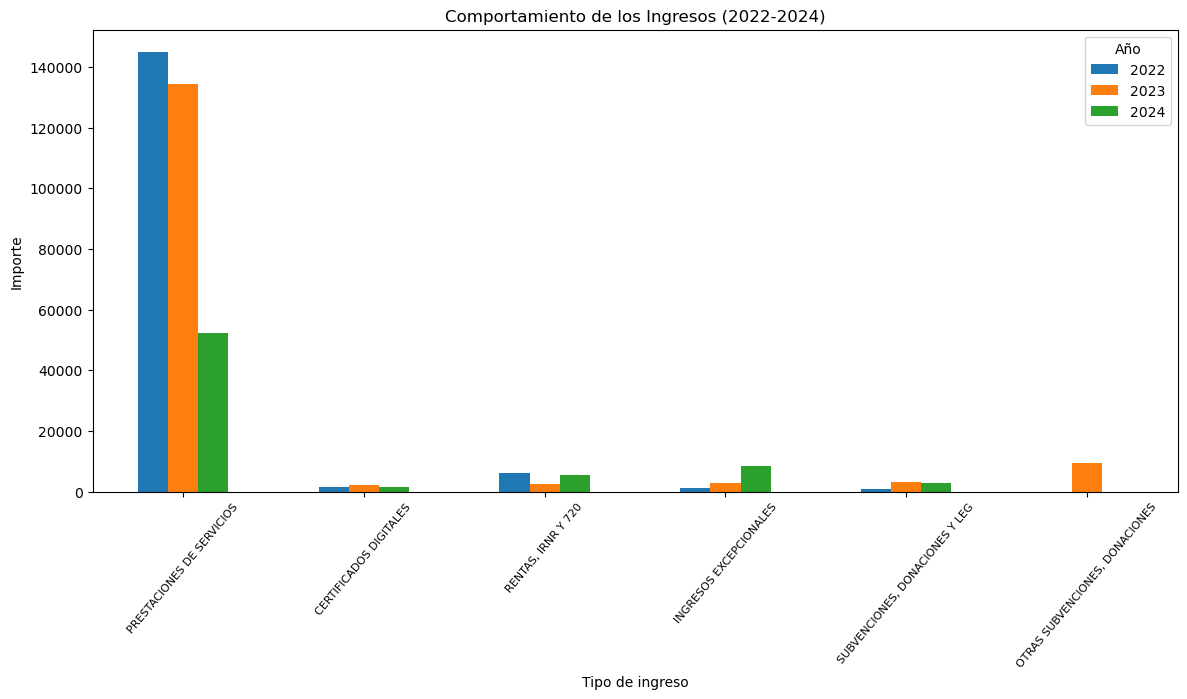

In [67]:
# Filtrar los ingresos
ingresos = df[df['Tipo'] == 'Ingreso']

# Gráfico de barras agrupadas para el comportamiento de los ingresos a lo largo de los años
ingresos.set_index('Cuenta')[[2022, 2023, 2024]].plot(kind='bar', figsize=(14, 6))
plt.xlabel('Tipo de ingreso', fontsize=10)
plt.ylabel('Importe', fontsize=10)
plt.title('Comportamiento de los Ingresos (2022-2024)')
plt.xticks(rotation=50, fontsize=8)
plt.legend(title='Año')
plt.show()

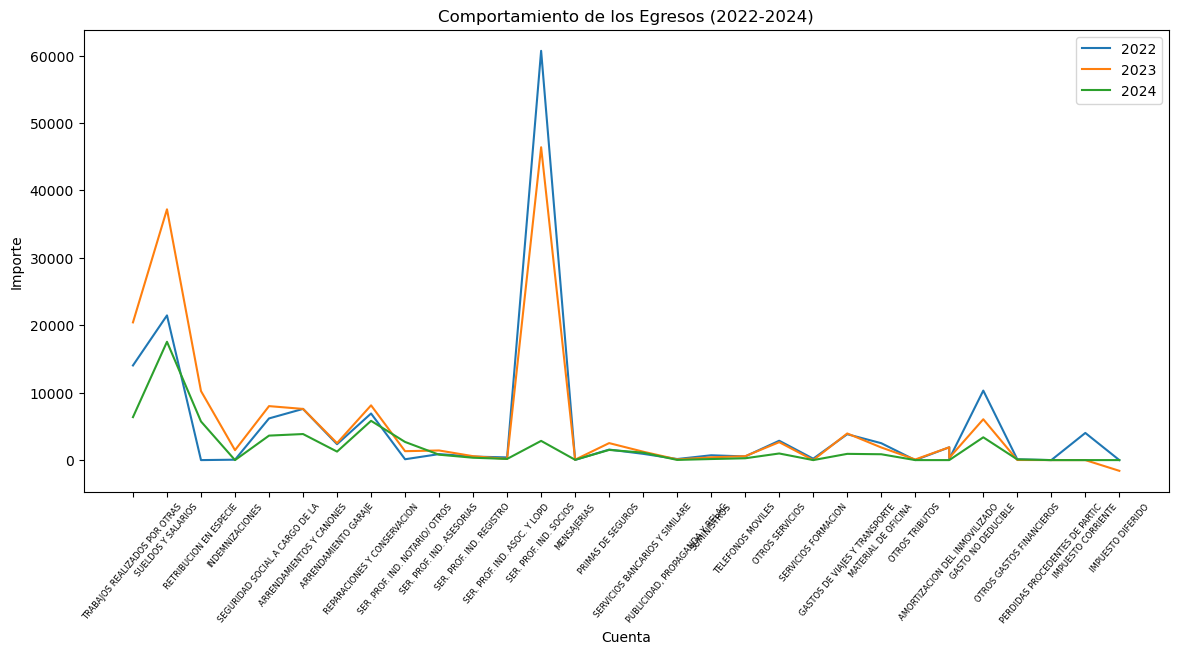

In [63]:
# Filtrar los egresos
egresos = df[df['Tipo'] == 'Egreso']

# Gráfico del comportamiento de los egresos a lo largo de los años
plt.figure(figsize=(14, 6))
plt.plot(egresos['Cuenta'], egresos[2022], label='2022')
plt.plot(egresos['Cuenta'], egresos[2023], label='2023')
plt.plot(egresos['Cuenta'], egresos[2024], label='2024')
plt.xlabel('Cuenta')
plt.ylabel('Importe')
plt.title('Comportamiento de los Egresos (2022-2024)')
plt.legend()
plt.xticks(rotation=50, fontsize=6)
plt.show()

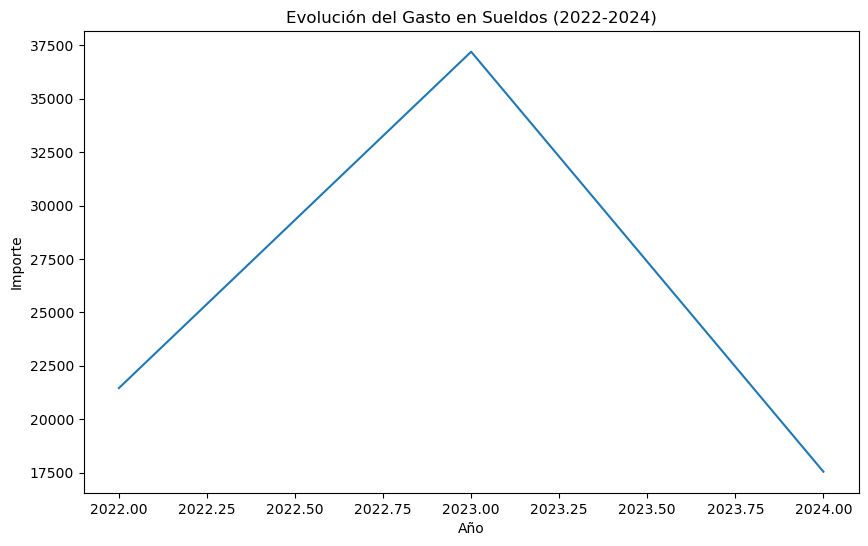

In [69]:
# Filtrar la cuenta de Sueldos
sueldos = egresos[egresos['Cuenta'] == 'SUELDOS Y SALARIOS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [sueldos[2022].values[0], sueldos[2023].values[0], sueldos[2024].values[0]])
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución del Gasto en Sueldos (2022-2024)')
plt.show()

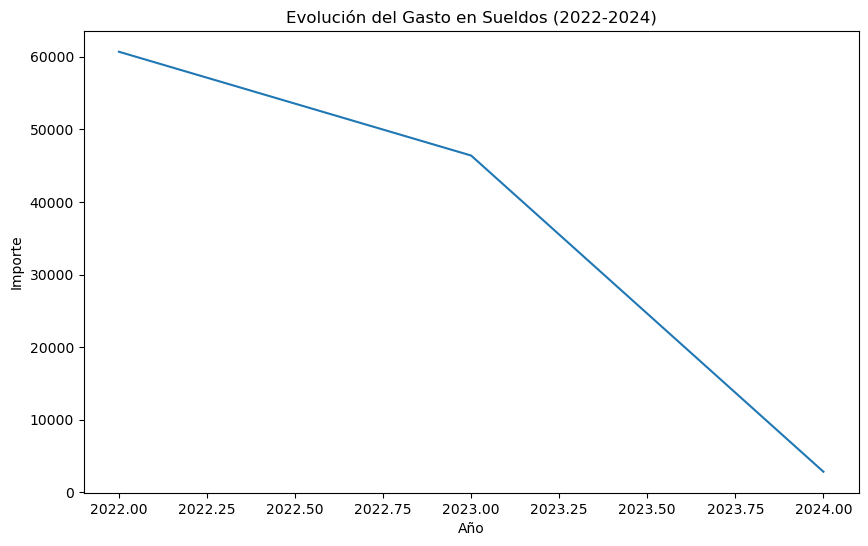

In [73]:
# Filtrar la cuenta de Sueldos
ser_prof_soc = egresos[egresos['Cuenta'] == 'SER. PROF. IND. SOCIOS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [ser_prof_soc[2022].values[0], ser_prof_soc[2023].values[0], ser_prof_soc[2024].values[0]])
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución del Gasto en Sueldos (2022-2024)')
plt.show()

In [ ]:
TRABAJOS REALIZADOS POR OTRAS	

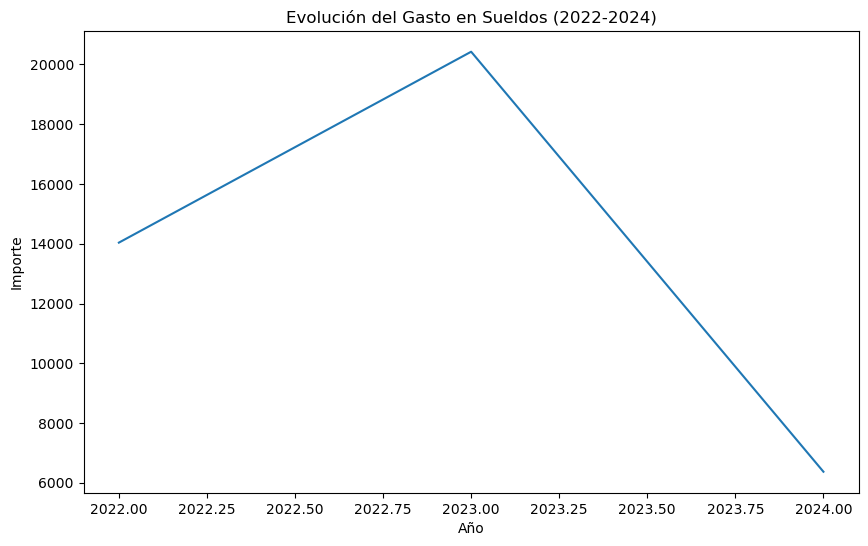

In [75]:
# Filtrar la cuenta de Sueldos
trab_real_otras_per = egresos[egresos['Cuenta'] == 'TRABAJOS REALIZADOS POR OTRAS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [trab_real_otras_per[2022].values[0], trab_real_otras_per[2023].values[0], trab_real_otras_per[2024].values[0]])
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución del Gasto en Sueldos (2022-2024)')
plt.show()

In [77]:
# Por ejemplo, ratio de ingresos/egresos por año
ratio_2022 = ingresos[2022].sum() / egresos[2022].sum()
ratio_2023 = ingresos[2023].sum() / egresos[2023].sum()
ratio_2024 = ingresos[2024].sum() / egresos[2024].sum()

print(f"Ratio Ingresos/Egresos 2022: {ratio_2022:.2f}")
print(f"Ratio Ingresos/Egresos 2023: {ratio_2023:.2f}")
print(f"Ratio Ingresos/Egresos 2024: {ratio_2024:.2f}")

Ratio Ingresos/Egresos 2022: 1.03
Ratio Ingresos/Egresos 2023: 0.93
Ratio Ingresos/Egresos 2024: 1.17


In [79]:
ratios = {
    2022: ratio_2022,
    2023: ratio_2023,
    2024: ratio_2024
}

# Convertir a DataFrame para facilidad de graficación
ratios_df = pd.DataFrame(list(ratios.items()), columns=['Año', 'Ratio'])
ratios_df

,Año,Ratio
0,2022,1.025474
1,2023,0.931280
2,2024,1.169368


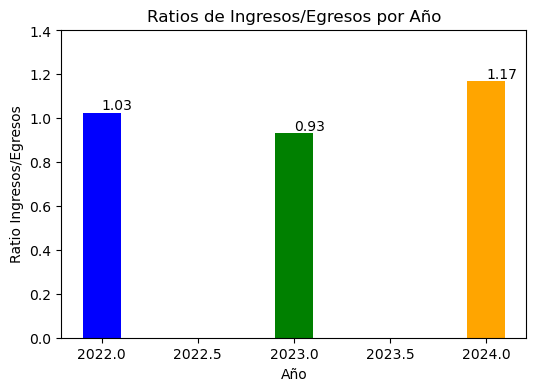

In [117]:
# Gráfico de barras con anotaciones para los ratios de ingresos/egresos por año
plt.figure(figsize=(6, 4))
bars = plt.bar(ratios_df['Año'], ratios_df['Ratio'], color=['blue', 'green', 'orange'], width=0.2)
plt.xlabel('Año')
plt.ylabel('Ratio Ingresos/Egresos')
plt.title('Ratios de Ingresos/Egresos por Año')
plt.ylim(0, max(ratios_df['Ratio']) * 1.2)  # Ajustar el límite del eje y

# Añadir anotaciones en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

In [85]:
# Por ejemplo, ratio de ingresos/egresos por año
beneficio_2022 = ingresos[2022].sum() - egresos[2022].sum()
beneficio_2023 = ingresos[2023].sum() - egresos[2023].sum()
beneficio_2024 = ingresos[2024].sum() - egresos[2024].sum()

print(f"Beneficio 2022: {beneficio_2022:.2f}")
print(f"Beneficio 2023: {beneficio_2023:.2f}")
print(f"Beneficio 2024: {beneficio_2024:.2f}")

Beneficio 2022: 3849.79
Beneficio 2023: -11385.63
Beneficio 2024: 10239.88


In [95]:
beneficio = {
    2022: beneficio_2022,
    2023: 0,
    2024: beneficio_2024
}

# Convertir a DataFrame para facilidad de graficación
beneficio_df = pd.DataFrame(list(beneficio.items()), columns=['Año', 'Beneficio'])
beneficio_df

,Año,Beneficio
0,2022,3849.79
1,2023,0.00
2,2024,10239.88


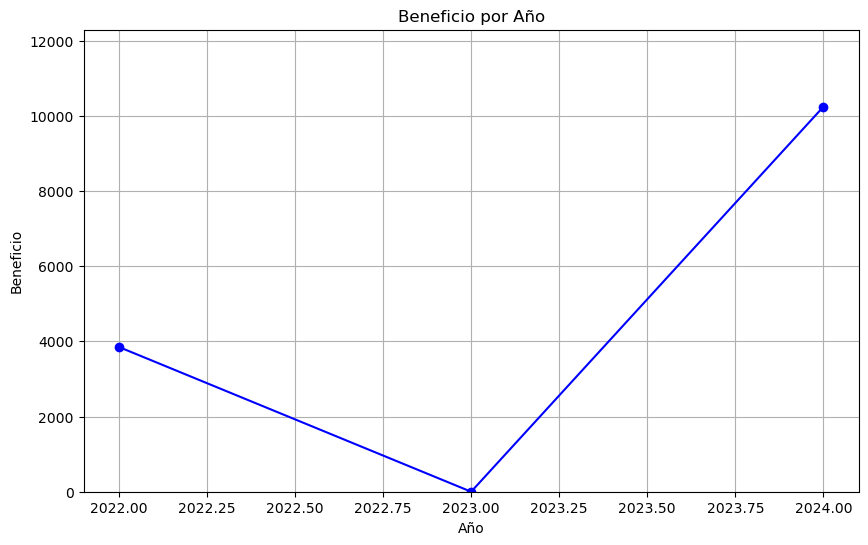

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(beneficio_df['Año'], beneficio_df['Beneficio'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Beneficio')
plt.title('Beneficio por Año')
plt.ylim(0, max(beneficio_df['Beneficio']) * 1.2)  # Ajustar el límite del eje y
plt.grid(True)
plt.show()

In [ ]:
# Guardar el cuaderno como un archivo de Jupyter Notebook
!jupyter nbconvert --to notebook --output "analisis_financiero.ipynb" "C:/Users/Jonathan/Documents/Machine Learning/Estudio ABS/cuaderno.ipynb"